<a href="https://colab.research.google.com/github/visionNoob/Keras_Tutorial/blob/master/Keras_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형 회귀) 예제

# 라이브러리 불러오기

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)

1.14.0
2.2.5
3.0.3


# 랜덤 시드 설정하기 (중요!)

In [0]:
seed_value = 72

# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
#import os
#os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
#import random
#random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 데이터셋

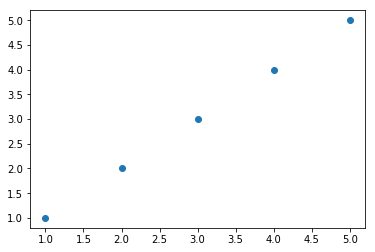

In [4]:
# 주어진 데이터 확인
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 표로 출력
plt.plot(x_data, y_data, 'o')
plt.show()

# 모델 만들기

In [5]:
# 2. 모델 구성하기
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1, input_dim=1, activation=None, use_bias=True))

In [6]:
model.get_weights()

[array([[0.7365836]], dtype=float32), array([0.], dtype=float32)]

0.7365836

# 3. 모델 학습과정 설정하기

In [7]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

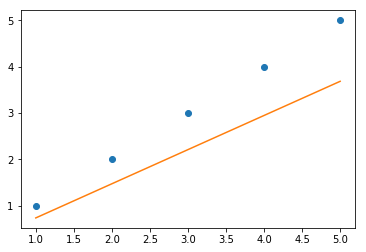

In [8]:
yhat = model.predict(x_data)

# 표로 출력
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, yhat)
plt.show()

In [76]:
hist = model.fit(x_data, y_data, epochs=1, batch_size=4)

Epoch 1/1
5/5 [==============================] - 0s 3ms/step - loss: 0.0615 - acc: 1.0000


# 다시 돌아와서 가설과 Cost Function을 이용해 계산해봅시다.
## GradientTape()
* 위에서는 직접 가중치의 업데이트를 진행
* TF에서 지원하는 함수로 업데이트할 가중치를 계산해 주는 역할
* Cost 함수와 예측 값으로 가중치를 얼마나 업데이트할지 결정해준다.

In [0]:
W = tf.Variable(1.7) # 임의의 값
b = tf.Variable(0.5) # 임의의 값

with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  
W_grad, b_grad = tape.gradient(cost, [W, b])

print(W_grad, b_grad)


Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Tile in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Neg in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastGradientArgs in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(18.400002, shape=(), dtype=float32) tf.Tensor(5.2000003, shape=(), dtype=float32)


## assign_sub()

* A = A - B
* A -= B
* 위의 계산을 해주는 함수

* 가중치 값을 업데이트

In [0]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

Executing op AssignSubVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


(1.516, 0.448)

### 여러번 돌려봅시다.

    0|    1.3756|    0.4081|  4.516528
   10|    0.9549|    0.2814|  0.033990
   20|    0.9290|    0.2645|  0.012853
   30|    0.9295|    0.2551|  0.011926
   40|    0.9317|    0.2466|  0.011144
   50|    0.9340|    0.2384|  0.010415
   60|    0.9362|    0.2305|  0.009733
   70|    0.9383|    0.2228|  0.009095
   80|    0.9403|    0.2154|  0.008500
   90|    0.9423|    0.2082|  0.007943


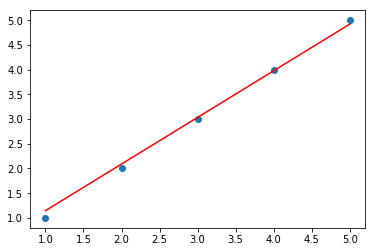

In [0]:
for i in range(100):
    with tf.GradientTape() as tape:
        #가설 설정
        hypothesis = W * x_data + b
        # Cost 함수 설정
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W, b]) # gradient 계산
    
    learning_rate = 0.01
    # 가중치 업데이트
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.show()
